In [1]:
""" setup """
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
plt.style.use(['classic'])

from redbaron import redbaron
redbaron.ipython_behavior = False

from pyha.simulation.simulation_interface import assert_sim_match

from scipy import signal
from pyhacores.under_construction.interpolator.model import Interpolator
from pyhacores.under_construction.clock_recovery.gardner import GardnerTimingRecovery

<IPython.core.display.Javascript object>


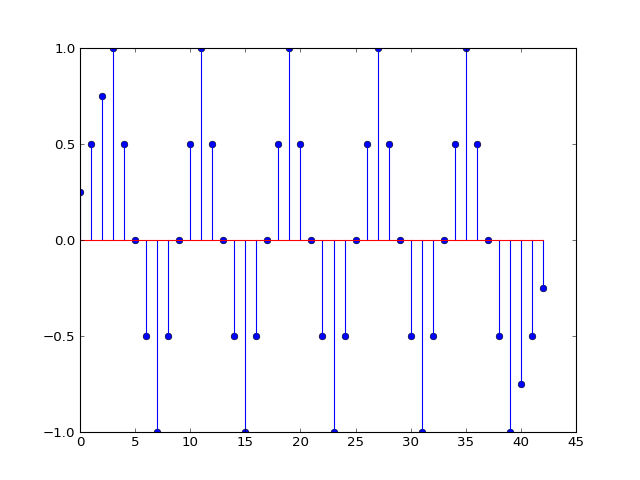

In [2]:
def insig(bits, sps):
    nrz = [[1]*sps if x == 1 else [-1]*sps for x in bits]
    nrz = np.array(nrz).flatten()
    
    taps = [1 / sps] * sps
    matched = np.convolve(nrz, taps, mode='full')
    return matched


# input data
data = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
sps = 4
match_filtered = insig(data, sps)
plt.stem(match_filtered)
plt.show()

<IPython.core.display.Javascript object>


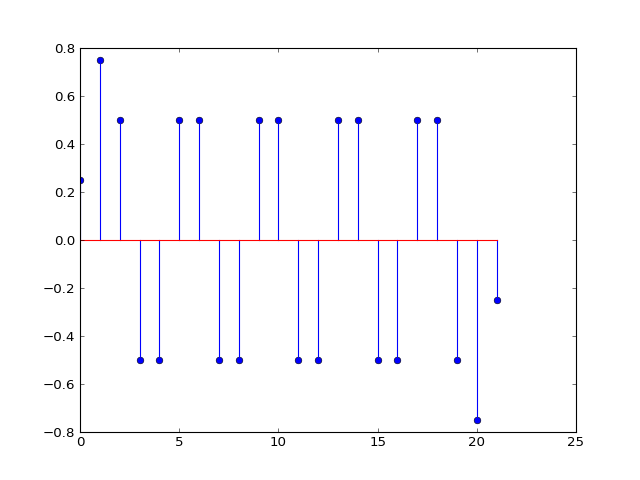

<IPython.core.display.Javascript object>


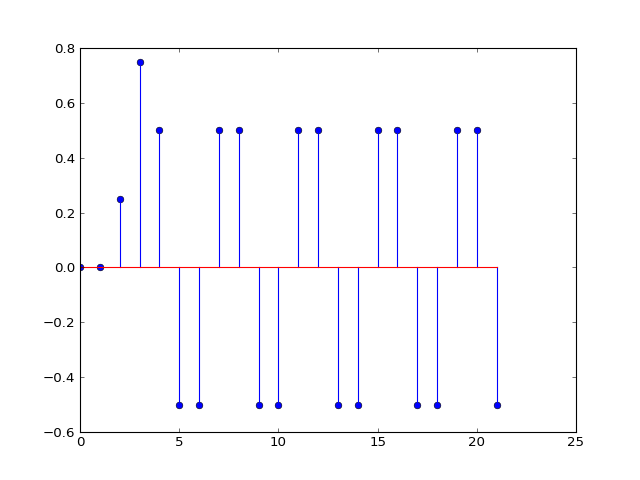

<IPython.core.display.Javascript object>


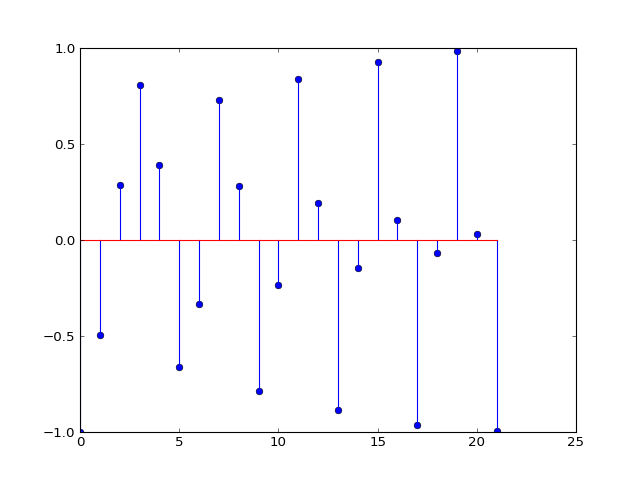

In [3]:
sig = match_filtered[::2]
plt.stem(sig)
plt.show()

interpolator = Interpolator()

io = [interpolator.filter(x, 0.0) for x in match_filtered]
io = io[::2]
plt.stem(io)
plt.show()

muramp = np.array(list(range(len(match_filtered)))) / len(match_filtered)
io = [interpolator.filter(x, mu) for x,mu in zip(match_filtered, muramp)]
io = io[::2]
plt.stem(io)
plt.show()

643
1.01265822785 0.996835443038
2.00949367089 1.99367088608
3.00632911392 2.99050632911
4.00316455696 3.98734177215
5.0 4.98417721519


<IPython.core.display.Javascript object>


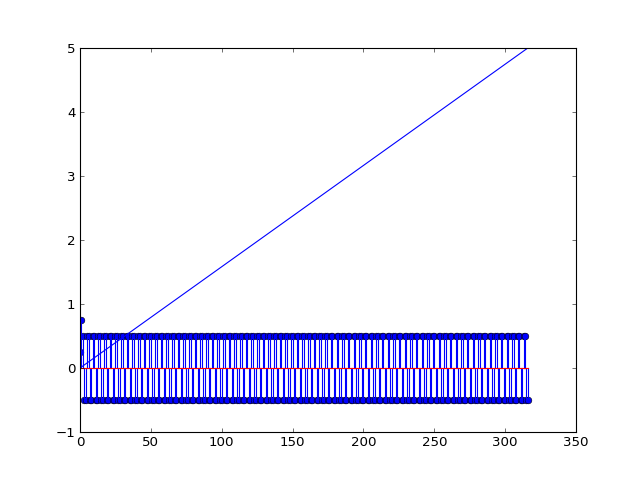

<IPython.core.display.Javascript object>


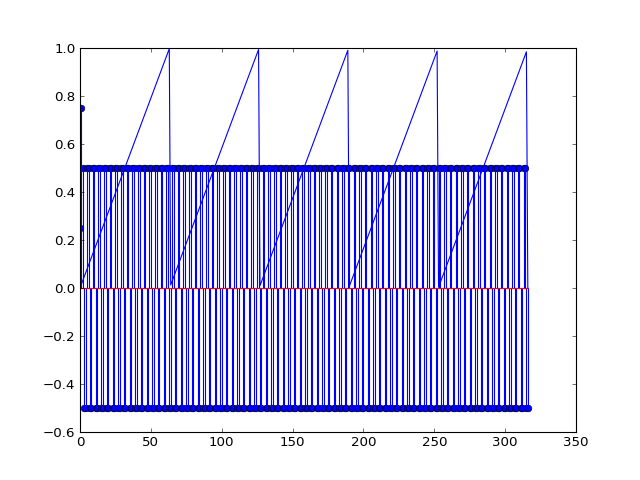

<IPython.core.display.Javascript object>


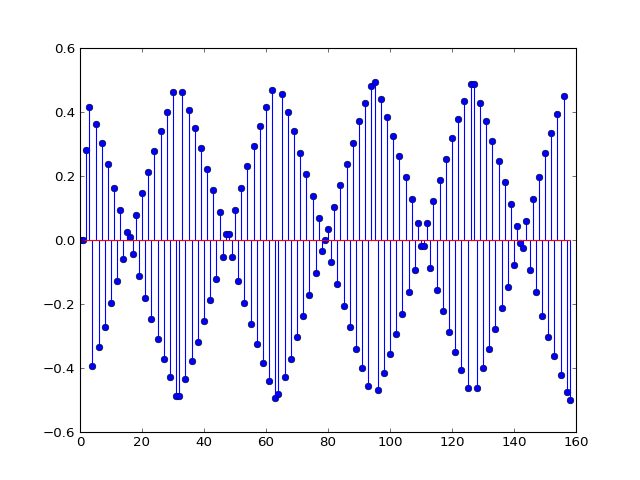

In [4]:
interpolator = Interpolator()
data = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0] * 16
sps = 4
match_filtered = insig(data, sps)

print(len(match_filtered))

noutitems = len(match_filtered)//2 - 4
muramp = np.linspace(0, 5, noutitems)
nm = []
ii = 0
for i in range(noutitems):
    nm.append(match_filtered[ii])
    ii += 2
    if i != 0:
        if int(muramp[i]) != int(muramp[i-1]):
            print(muramp[i], muramp[i-1])
#             ii += 2
#     if i == 10:
#         ii -= 1

plt.stem(nm)
plt.plot(muramp)
plt.show()

muramp = muramp%1

plt.stem(nm)
plt.plot(muramp)
plt.show()

io = nm
io = [interpolator.filter(x, mu) for x,mu in zip(nm, muramp)]
io = io[::2]
plt.stem(io)
plt.show()

<IPython.core.display.Javascript object>


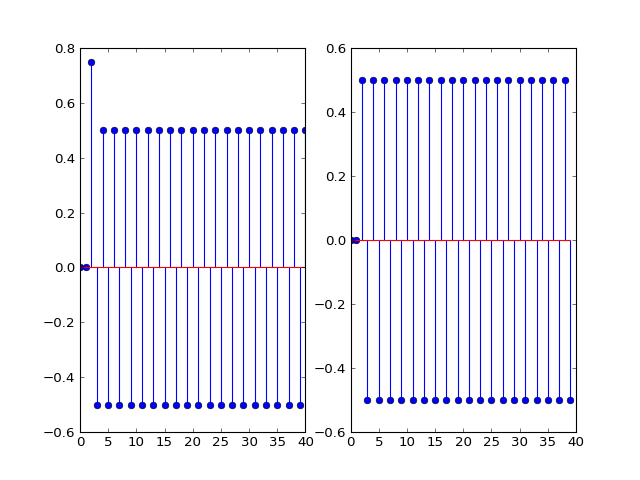

<IPython.core.display.Javascript object>


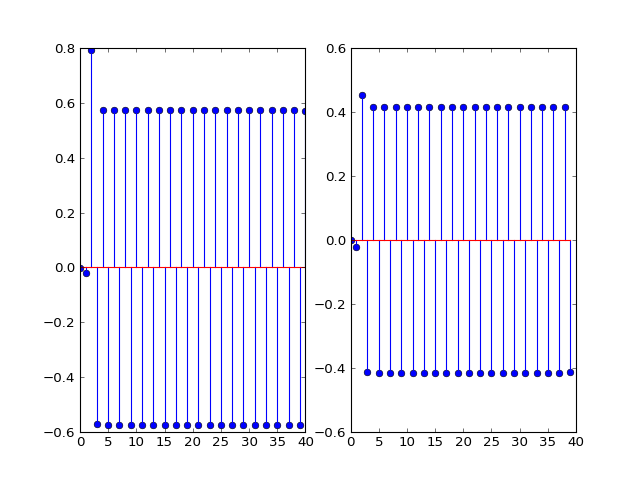

<IPython.core.display.Javascript object>


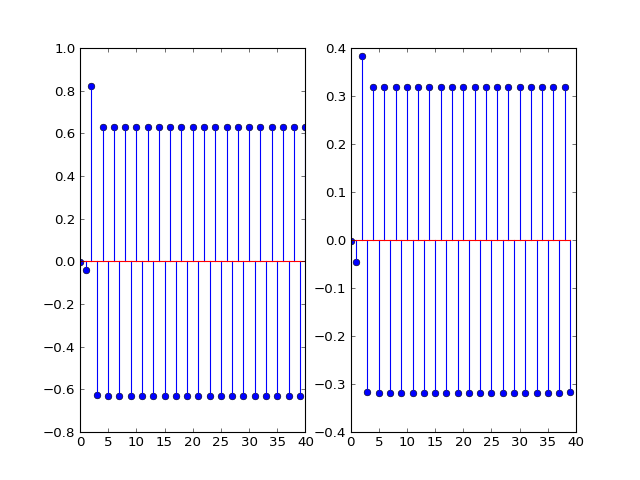

<IPython.core.display.Javascript object>


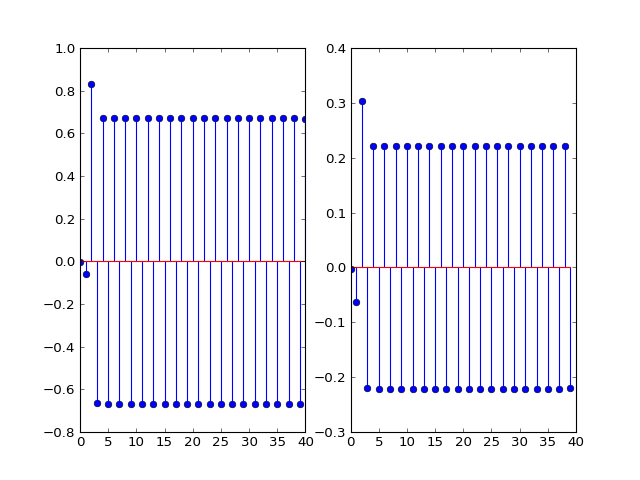

<IPython.core.display.Javascript object>


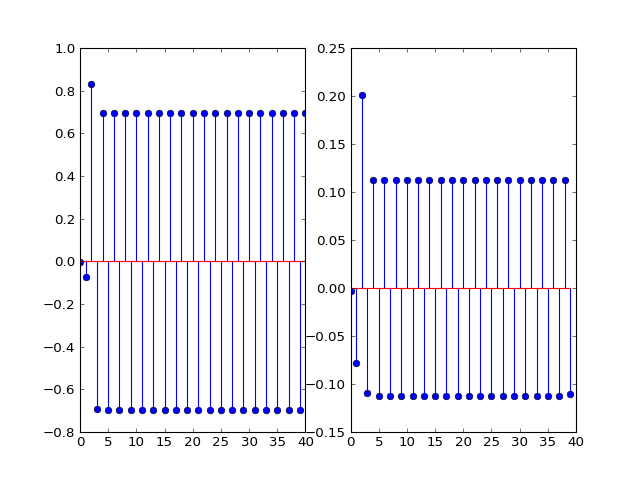

<IPython.core.display.Javascript object>


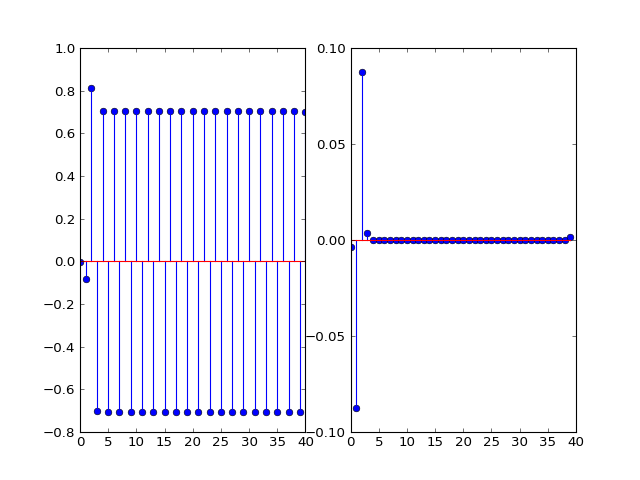

<IPython.core.display.Javascript object>


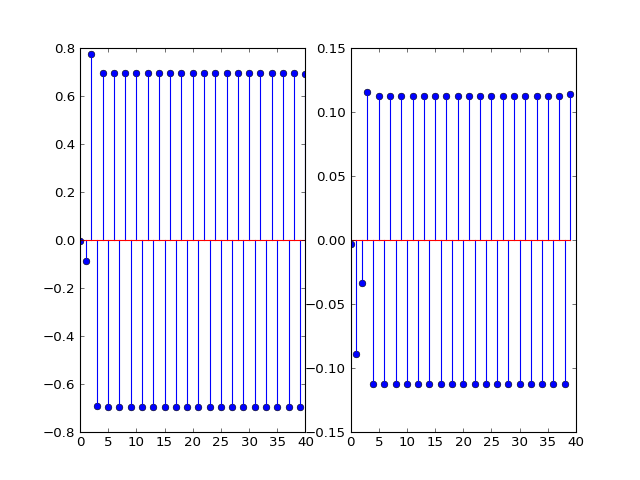

<IPython.core.display.Javascript object>


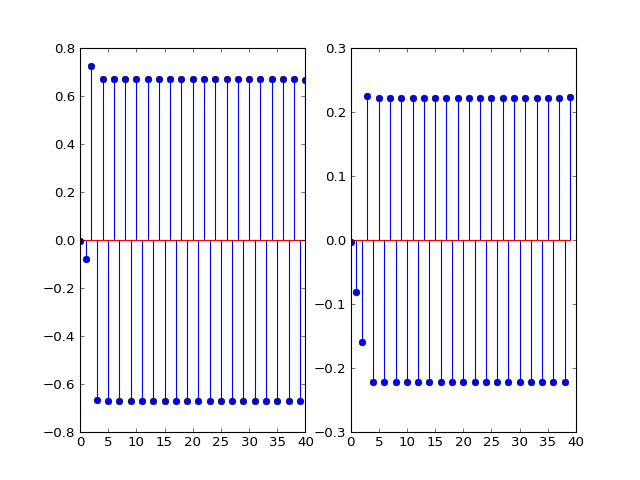

<IPython.core.display.Javascript object>


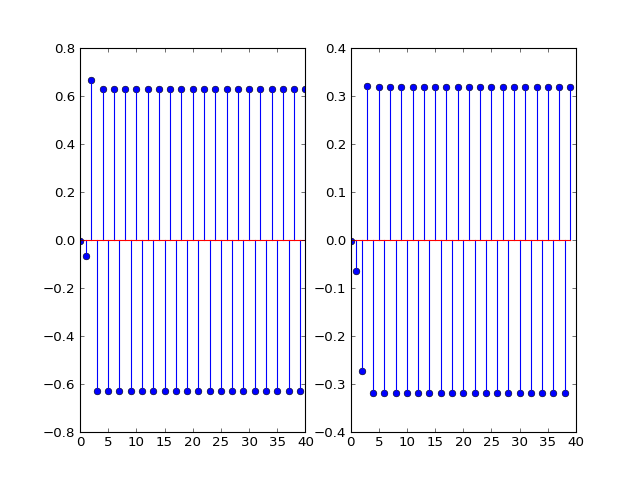

<IPython.core.display.Javascript object>


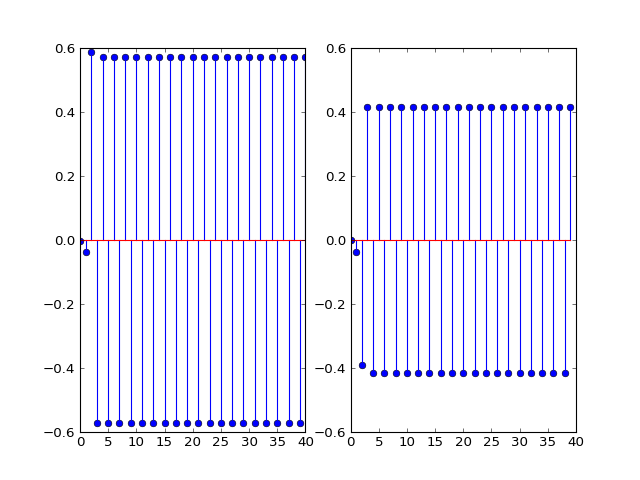

In [5]:
data = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0] * 4
sps = 4
match_filtered = insig(data, sps)
interpolator = Interpolator()

match_filtered = match_filtered[2:]

for ii in range(10):
    sig = match_filtered[::sps//2]
    
    interpolator = Interpolator()
    io = [interpolator.filter(x, ii/10) for x,mu in zip(sig, muramp)]
    # io = 
    outsig = io[::2]
    plt.subplot(1,2,1)
    plt.stem(outsig)
#     plt.stem(io)
    
    sig = match_filtered[::sps//2]
    sig = sig[1:]
    interpolator = Interpolator()
    io = [interpolator.filter(x, ii/10) for x,mu in zip(sig, muramp)]
    outsig = io[::2]
    plt.subplot(1,2,2)
    plt.stem(outsig)
#     plt.stem(io)

    
    plt.show()

<IPython.core.display.Javascript object>


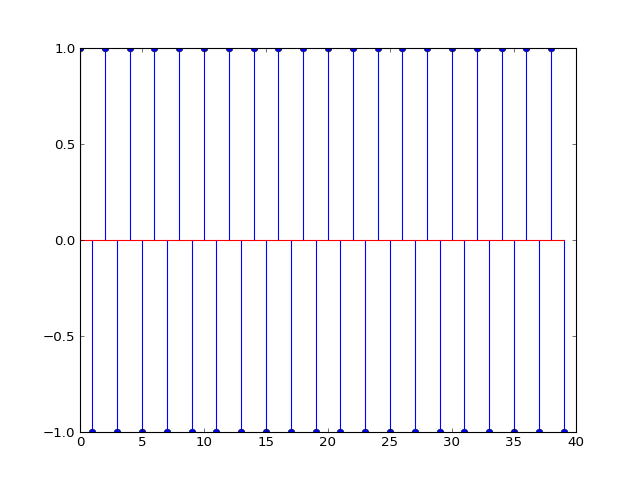

In [6]:
sig = match_filtered[1::4]
plt.stem(sig)
plt.show()

<IPython.core.display.Javascript object>


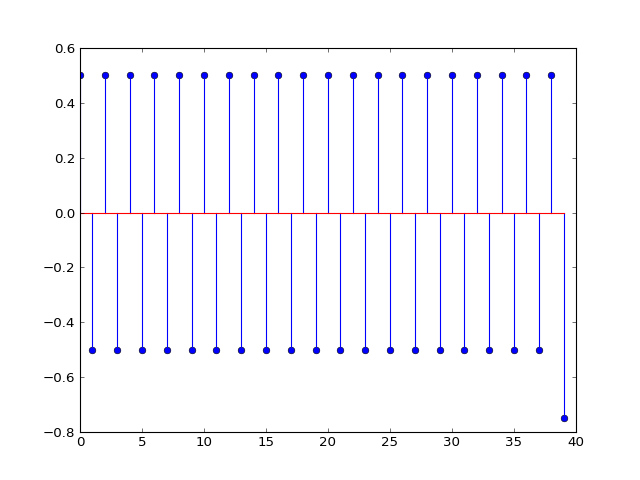

In [7]:
sig = match_filtered[2::4]
plt.stem(sig)
plt.show()

<IPython.core.display.Javascript object>


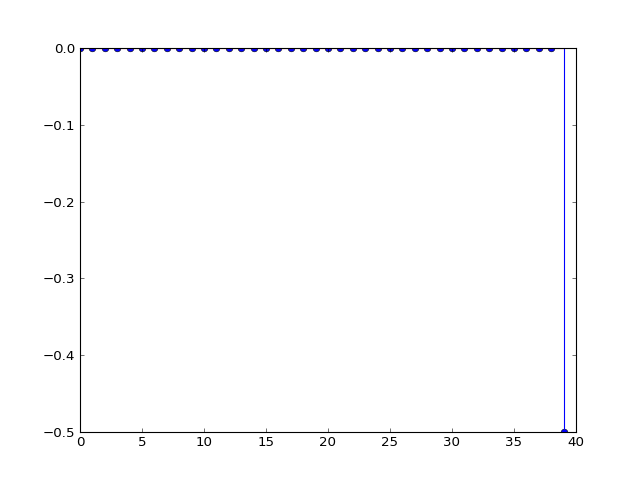

In [8]:
sig = match_filtered[3::4]
plt.stem(sig)
plt.show()